In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#%tensorflow_version 1.x
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import initializers

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/training.csv")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test.csv")
print (train.shape)
print (test.shape)

(1000000, 5)
(399890, 4)


In [4]:
train.head()

,target,id,date,user,text
0,0,2224496154,Thu Jun 18 09:34:25 PDT 2009,Deborah_Fay,Okay for some reason I still can't get the ba...
1,4,1687934301,Sun May 03 09:56:56 PDT 2009,haills,http://twitpic.com/4hjnj - Don't worry be happ...
2,0,1972073814,Sat May 30 08:30:21 PDT 2009,lechellealice,this movie is so sad
3,4,1557632618,Sun Apr 19 05:13:47 PDT 2009,janeslee,Good afternoon world. Been too busy to tweet. ...
4,4,1969750122,Sat May 30 01:05:20 PDT 2009,bvdaily,@QueensleyFelix LOL!We are just too classy I ...


In [5]:
test.head()

,id,date,user,text
0,1974447176,Sat May 30 13:09:18 PDT 2009,ugro,That's pretty much how I think it works with i...
1,1752584531,Sat May 09 22:20:24 PDT 2009,infinities,Holy awesome Leonard Nimoy! Also thought I sp...
2,2265878673,Sun Jun 21 07:29:15 PDT 2009,revybbcholic,@theodorainish yes they are I've tried to not...
3,1995188099,Mon Jun 01 13:05:22 PDT 2009,teddyrised,Millvina Dean the last known survivor of the ...
4,2071942859,Sun Jun 07 20:08:43 PDT 2009,kaylabeth_,I REALLY DO NOT LIKE THIS ROGER. Adam Pascal p...


In [6]:
# Sample the train dataframe (this is temporary) 
sample = train.sample(frac=0.1, replace=False, random_state=42)
sample.shape

(100000, 5)

In [0]:
# date and user not taken into consideration for now
tweets = sample["text"].values
y = sample["target"].values

tweets_train, tweets_test, y_train_full, y_test = train_test_split(tweets, y, test_size=0.20, random_state=42)

In [0]:
# Vectorise the text using CountVectorizer
# NLTK's list of english stopwords to be excluded
stopWords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he",
             "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs",
             "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", 
             "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but",
             "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", 
             "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on",
             "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all",
             "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same",
             "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

vectorizer = CountVectorizer(stop_words=stopWords)
vectorizer.fit(tweets_train)

X_train_full = vectorizer.transform(tweets_train)
X_test  = vectorizer.transform(tweets_test)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [9]:
# Have a look at the vocabulary
vectorizer.vocabulary_

{'awesome': 8095,
 'day': 19657,
 'surfing': 69490,
 'relaxing': 59829,
 'eating': 23103,
 'good': 29681,
 'food': 27129,
 'lovely': 43860,
 'lady': 41186,
 'liz': 43129,
 'dinner': 21039,
 'movie': 49116,
 'one': 53194,
 'best': 9887,
 'days': 19682,
 'ever': 24967,
 'away': 8078,
 'get': 28931,
 'ready': 59192,
 'go': 29518,
 'town': 73527,
 'must': 49865,
 'crazy': 17926,
 'going': 29605,
 'saturday': 62758,
 'screaming': 63258,
 'kids': 39920,
 'galore': 28389,
 'wait': 77234,
 'feels': 26131,
 'like': 42603,
 'outcast': 53758,
 'work': 79070,
 'really': 59254,
 'sad': 62055,
 'hungry': 33353,
 'want': 77369,
 'kebab': 39353,
 'delhi': 20181,
 'sleeps': 65879,
 'dhush': 20753,
 'argh': 7061,
 'shouldn': 64892,
 'come': 16716,
 'home': 32670,
 'guess': 30526,
 'camera': 13389,
 'fail': 25599,
 'video': 76607,
 'kick': 39862,
 'jams': 36080,
 'didn': 20873,
 'happen': 31194,
 'rare': 58942,
 'sunday': 69215,
 'internet': 34980,
 'session': 63878,
 'downloading': 22157,
 'bad': 8505,


In [0]:
input_dim = X_train.shape[1]  # Number of features

1
2
3
4
5
6
7


In [0]:
# This model with mse,adam: kaggle score 0.71
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dense(10))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# This model with mse,SGD. kaggle score: 0.70
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
for i in range(1,8):
  model.add(layers.Dense(10))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
# Best kaggle score with first model: 0.65
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 10)                815900    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 816,171
Trainable params: 816,151
Non-trainable params: 20
_________________________________________________________________


In [56]:
#Best kaggle score with first model: 0.69
##Best kaggle score with first model: 0.70

model.compile(loss='mean_squared_error', 
              optimizer='SGD', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 10)                815900    
_________________________________________________________________
dense_56 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_57 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_60 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_61 (Dense)             (None, 10)              

In [57]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_valid, y_valid),
                    batch_size=100)

Epoch 1/100
600/600 [==============================] - 2s 4ms/step - loss: 4.4762 - accuracy: 0.1714 - val_loss: 4.3385 - val_accuracy: 0.1715
Epoch 2/100
600/600 [==============================] - 3s 4ms/step - loss: 4.3120 - accuracy: 0.1898 - val_loss: 4.3360 - val_accuracy: 0.1923
Epoch 3/100
600/600 [==============================] - 3s 4ms/step - loss: 4.2721 - accuracy: 0.2122 - val_loss: 4.3073 - val_accuracy: 0.1656
Epoch 4/100
600/600 [==============================] - 3s 4ms/step - loss: 4.2417 - accuracy: 0.2334 - val_loss: 4.3643 - val_accuracy: 0.2453
Epoch 5/100
600/600 [==============================] - 3s 4ms/step - loss: 4.2192 - accuracy: 0.2524 - val_loss: 4.3207 - val_accuracy: 0.1969
Epoch 6/100
600/600 [==============================] - 3s 4ms/step - loss: 4.2012 - accuracy: 0.2682 - val_loss: 4.3206 - val_accuracy: 0.2024
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 4.1833 - accuracy: 0.2842 - val_loss: 4.3346 - val_accuracy: 0.2251

In [63]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5133
Testing Accuracy:  0.3625


In [0]:
test_vectorizer = CountVectorizer(stop_words=stopWords)
test_text = test["text"].values
test_vectorizer.fit(test_text)
newtest = vectorizer.transform(test_text)

In [0]:
final_predictions = model.predict(newtest)

In [66]:
rounded = [round(x[0])*4 for x in final_predictions]
print(rounded)

[4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 4.0, 4.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 0.0, 4.0, 4.0, 0.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 0.0, 0.0,

In [0]:
submission = pd.DataFrame(test["id"])
submission["target"] = rounded

In [0]:
submission.to_csv("submission.csv")

In [0]:
#-----------------------------END----------------------------

In [0]:
# Method two

# Make the model in keras
model = Sequential([
 layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 layers.Dense(1)                                
])

model.compile(loss="mean_squared_error", optimizer="sgd",metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid)
                    )

mse_test = model.evaluate(X_test, y_test)
print(mse_test)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 3.1846 - accuracy: 0.0638 - val_loss: 2.8075 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6479 - accuracy: 0.1481 - val_loss: 2.6688 - val_accuracy: 0.1372
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.4310 - accuracy: 0.1794 - val_loss: 2.6399 - val_accuracy: 0.1813
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2531 - accuracy: 0.1949 - val_loss: 2.6359 - val_accuracy: 0.2053
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0879 - accuracy: 0.2073 - val_loss: 2.6150 - val_accuracy: 0.1990
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9339 - accuracy: 0.2195 - val_loss: 2.6083 - val_accuracy: 0.2030
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7804 - accuracy: 0.2306 - val_loss: 2.6570 - val_accuracy:

In [0]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.4684
Testing Accuracy:  0.2427


(0.0, 10.0)

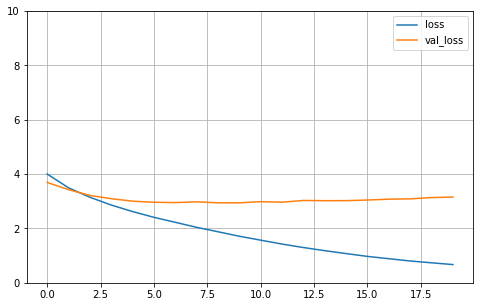

In [0]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 10)

625/625 [==============================] - 3s 5ms/step - loss: 2.6530 - accuracy: 0.1949
[2.652981758117676, 0.1949000060558319]


NameError: ignored

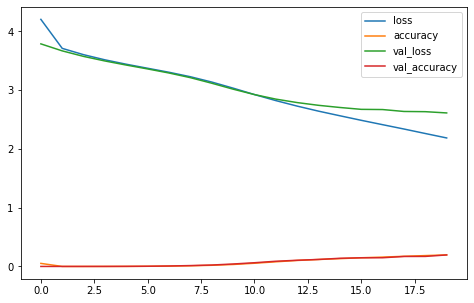

In [0]:
# Deep and Wide Neural Network
# Model with the same input being passed in to the Deep and Wide

input_tweets = layers.Input(shape=X_train.shape[1:])
hidden1 = layers.Dense(30, activation="relu")(input_tweets)
hidden2 = layers.Dense(30, activation="relu")(hidden1)
concat = layers.Concatenate()([input_tweets,hidden2])
output = layers.Dense(1)(concat)
model = Model(inputs=[input_tweets], outputs=[output])

model.compile(loss="mse", optimizer=optimizers.SGD(lr=1e-3), metrics=['accuracy'])

# Fit the model
# Note that I have set verbose=0 so that it doesn't show all the epoch output when training
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
mse_test = model.evaluate(X_test, y_test)
print(mse_test)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [0]:
#Method 4
# Feed Forward 4 layer network - with He Normalization

input_tweets = layers.Input(shape=X_train.shape[1:])

# Using the He Normalisation - with the defaults
hidden1 = layers.Dense(30, activation="relu", kernel_initializer="he_normal")(input_tweets)

# Using the He Normalisation - by creating a class and scaling as desired
he_avg_init = initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
hidden2 = layers.Dense(30, activation="relu", kernel_initializer=he_avg_init)(hidden1)

output = layers.Dense(1)(hidden2)
model = models.Model(inputs=[input_tweets], outputs=[output])
model.compile(loss="mse", optimizer=optimizers.SGD(lr=1e-3), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), verbose=0)

625/625 [==============================] - 1s 2ms/step - loss: 3.2951 - accuracy: 0.3263
[3.295142650604248, 0.3262999951839447]


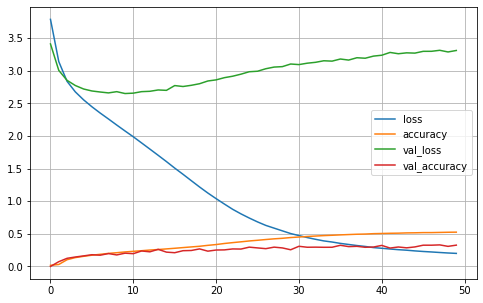

In [0]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [0]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5438
Testing Accuracy:  0.3263


In [0]:
# Method 5
# Batch normalisation and He Normalisation  followed by elu activation (pg 343)
input_tweets = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, kernel_initializer="he_normal")(input_tweets)
hidden1bn = keras.layers.BatchNormalization()(hidden1)
hidden1bne = keras.layers.Activation("elu")(hidden1bn)
hidden2 = keras.layers.Dense(30, kernel_initializer="he_normal")(hidden1bne)
hidden2bn = keras.layers.BatchNormalization()(hidden2)
hidden12bne = keras.layers.Activation("elu")(hidden1bn)
output = keras.layers.Dense(1)(hidden2bn)
model = keras.Model(inputs=[input_tweets], outputs=[output])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

# You can see that this config uses the same parameters but different layer orderings
model.summary()

63/63 [==============================] - 0s 1ms/step - loss: 4.3765
4.376527309417725
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15782)]           0         
_________________________________________________________________
dense_14 (Dense)             (None, 30)                473490    
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
activation (Activation)      (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_______________________________________

In [0]:
accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.1670
Testing Accuracy:  4.3765


In [0]:
# Method 6
# Gradient Clipping 
input_tweets = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, kernel_initializer="he_normal")(input_tweets)
hidden1bn = keras.layers.BatchNormalization()(hidden1)
hidden1bne = keras.layers.Activation("elu")(hidden1bn)
hidden2 = keras.layers.Dense(30, kernel_initializer="he_normal")(hidden1bne)
hidden2bn = keras.layers.BatchNormalization()(hidden2)
hidden12bne = keras.layers.Activation("elu")(hidden1bn)
output = keras.layers.Dense(1)(hidden2bn)
model = keras.Model(inputs=[input_tweets], outputs=[output])

# create an optimizer explicitly and then set the clip values
optimizer = keras.optimizers.SGD(clipvalue=1.0, lr=1e-3)

model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

63/63 [==============================] - 0s 1ms/step - loss: 4.2842
4.284192085266113


In [0]:
# with the above model...

def run_model_with_optimizer(name, model, optimizer):
  model.compile(loss="mse", optimizer = optimizer)
  print(name)
  history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
  mse_test = model.evaluate(X_test, y_test)
  print(mse_test)

# SGD Momentum Optimizer
# Changes the rate of the speed of learning i.e. acceleration defined by the momentum parameter
sgd_moment_optimizer = keras.optimizers.SGD(lr=1e-3, momentum=0.9)
run_model_with_optimizer("SGD", model, sgd_moment_optimizer)


# AdaGrad
adagrad_optimizer = keras.optimizers.Adagrad(lr=1e-3)
run_model_with_optimizer("Adagrad", model, adagrad_optimizer)

# RMS PROP

rmsprop_optimizer = keras.optimizers.RMSprop(lr=1e-3, rho=0.9)
run_model_with_optimizer("RMS prop", model, rmsprop_optimizer)

# ADAM - like the bot in Real Steel :-)
adam_optimizer = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
run_model_with_optimizer("Adam", model, adam_optimizer)

SGD
63/63 [==============================] - 0s 1ms/step - loss: 4.0782
4.078171730041504
Adagrad
63/63 [==============================] - 0s 1ms/step - loss: 4.1685
4.1685075759887695
RMS prop
63/63 [==============================] - 0s 1ms/step - loss: 4.1184
4.1184000968933105
Adam
63/63 [==============================] - 0s 1ms/step - loss: 4.1581
4.158143043518066


In [0]:
# L2 Regularizer
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                               activation="elu",
                               kernel_initializer="he_normal",
                               kernel_regularizer=keras.regularizers.l2(0.01))

input_tweets = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = RegularizedDense(30)(input_tweets)
hidden2 = RegularizedDense(30)(hidden1)
output = keras.layers.Dense(1)(hidden2)
model = keras.Model(inputs=[input_tweets], outputs=[output])
optimizer = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

run_model_with_optimizer("Adam with L2 Regularizer", model, optimizer)

Adam with L2 Regularizer
63/63 [==============================] - 0s 2ms/step - loss: 4.6854
4.685415744781494


In [0]:
# Dropouts and L2 Regularizer

input_tweets = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = RegularizedDense(30)(input_tweets)
hidden1drop = keras.layers.Dropout(rate=0.2)(hidden1)
hidden2 = RegularizedDense(30)(hidden1drop)
hidden2drop = keras.layers.Dropout(rate=0.2)(hidden2)
output = keras.layers.Dense(1)(hidden2drop)
model = keras.Model(inputs=[input_tweets], outputs=[output])
optimizer = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

run_model_with_optimizer("Adam with L2 Regularizer and Dropout", model, optimizer)

Adam with L2 Regularizer and Dropout
63/63 [==============================] - 0s 2ms/step - loss: 4.5454
4.545403480529785


In [0]:
# Learning Rate Scheduler

def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s) 
  return exponential_decay_fn


exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0, callbacks=[lr_scheduler])
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

63/63 [==============================] - 0s 2ms/step - loss: 4.3828
4.382771015167236
